In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_2020 = pd.read_csv("./2020input0.csv", header=None)
df_2020 = pd.DataFrame(
    df_2020[0].str.findall("(\d+)").to_list(), columns=["x_low", "x_high", "frequency"]
)
df_2020["x_low"] = df_2020["x_low"].astype(int)
df_2020["x_high"] = df_2020["x_high"].astype(int)
df_2020["frequency"] = df_2020["frequency"].astype(int)

df_2024 = pd.read_csv("./2024input0.csv", header=None, names=["grade"]).infer_objects()
df_2024["grade"] = df_2024["grade"].astype(int)

In [37]:
df_2020.head(5)

,x_low,x_high,frequency
0,0,4,2
1,4,8,0
2,8,12,1
3,12,16,1
4,16,20,0


In [4]:
df_2024.sample(5)

,grade
115,60
277,75
122,56
81,49
248,84


In [13]:
def calculate_mean_grouped_data(x_low, x_high, frequency):
    """
    Calculates the weighted mean of grouped data.

    Args:
        x_low: An array-like object containing the lower limits of the class intervals.
        x_high: An array-like object containing the upper limits of the class intervals.
        frequency: An array-like object containing the frequencies of each class interval.

    Returns:
        The weighted mean of the grouped data.
    """
    class_score = (x_low + x_high) / 2
    return np.sum(class_score * frequency) / np.sum(frequency)


def calculate_standard_dev_grouped_data(mean, x_low, x_high, frequency):
    """
    Calculates the weighted mean of grouped data.

    Args:
        mean: Float, the weighted mean of the distribution
        x_low: An array-like object containing the lower limits of the class intervals.
        x_high: An array-like object containing the upper limits of the class intervals.
        frequency: An array-like object containing the frequencies of each class interval.

    Returns:
        The standard deviation of the distribution
    """
    class_score = (x_low + x_high) / 2
    N = np.sum(frequency)
    return (
        np.sqrt(
            N * np.sum(frequency * (class_score**2))
            - np.sum(frequency * class_score) ** 2
        )
        / N
    )

In [31]:
mean_2020 = calculate_mean_grouped_data(
    df_2020["x_low"], df_2020["x_high"], df_2020["frequency"]
)
sigma_2020 = calculate_standard_dev_grouped_data(
    mean, df_2020["x_low"], df_2020["x_high"], df_2020["frequency"]
)

print(f"2020 Exam Distribution - Mean: {mean_2020}, Standard Deviation: {sigma_2020}")

2020 Exam Distribution - Mean: 63.21739130434783, Standard Deviation: 14.958232771382704


In [32]:
mean_2024 = df_2024['grade'].mean()
sigma_2024 = df_2024['grade'].std()
print(f"2024 Exam Distribution - Mean: {mean_2024}, Standard Deviation: {sigma_2024}")

2024 Exam Distribution - Mean: 59.23232323232323, Standard Deviation: 13.004023506385527


In [33]:
df_2024.describe()

,grade
count,297.000000
mean,59.232323
std,13.004024
min,11.000000
25%,52.000000
50%,59.000000
75%,68.000000
max,91.000000


In [54]:
[1] + [2]

[1, 2]

Text(80, 110, 'Student_00119292')

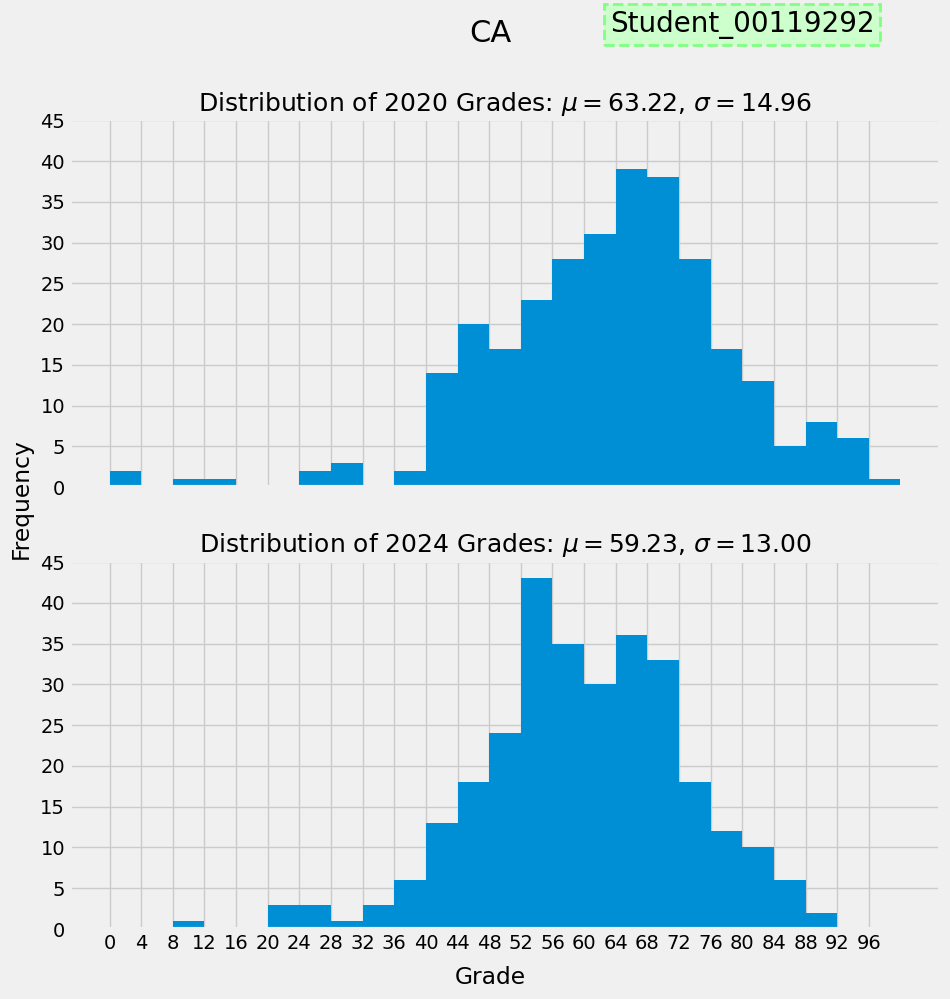

In [115]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 10))
plt.style.use("fivethirtyeight")
fig.supxlabel('Grade')
fig.supylabel('Frequency')

# 1. 2020 Grades
edges = list(np.arange(0, np.max(df_2020['x_high'] + 1), 4))
axes[0].stairs(df_2020['frequency'], edges=edges, fill=True)

axes[0].set_xticks(np.arange(0, np.max(df_2020['x_high']), 4))
axes[0].set_yticks(np.arange(0, 46, 5))
axes[0].set_title(f'Distribution of 2020 Grades: $\mu={mean_2020:.2f}$, $\sigma={sigma_2020:.2f}$', fontsize=18)

# 2. 2024 Grades
axes[1].hist(df_2024['grade'], bins=edges)
axes[1].set_title(f'Distribution of 2024 Grades: $\mu={mean_2024:.2f}$, $\sigma={sigma_2024:.2f}$', fontsize=18)


# Plot titles and detailing
plt.suptitle('CA', fontsize=22)
plt.text(
        80,
        110,
        'Student_00119292',
        size=20,
        rotation=0,
        ha="center",
        # va="center",
        bbox=dict(
            # boxstyle="round",
            ec=(0.5, 1.0, 0.5),
            fc=(0.8, 1.0, 0.8),
            linestyle='dashed',
            linewidth=2,
        ),
    )

<Axes: ylabel='Density'>

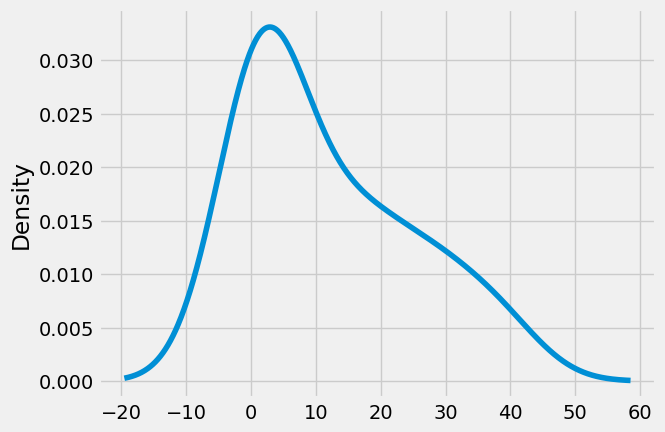

In [74]:
df_2020['frequency'].plot.kde()

(array([ 1.,  5.,  4., 15., 42., 71., 74., 52., 23., 10.]),
 array([11., 19., 27., 35., 43., 51., 59., 67., 75., 83., 91.]),
 <BarContainer object of 10 artists>)

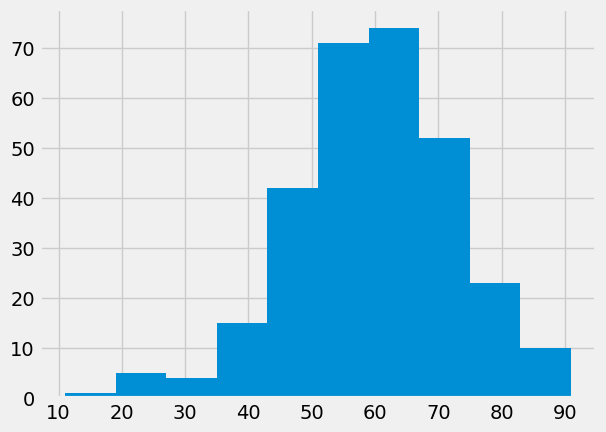

In [69]:
plt.style.use("fivethirtyeight")
plt.hist(df_2024['grade'])

In [71]:
np.sum(df_2020['frequency'])

299

In [70]:
len(df_2024.index)

297

In [62]:
def plot_histogram_2020():
    plt.style.use("fivethirtyeight")
    ...

In [ ]:
def plot_histogram_2024():
    ...